<a href="https://colab.research.google.com/github/victoriambalam/AttentionUnet-ACV-segmentation/blob/main/Notebooks/Taller_Pre_Congreso_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning para Procesamiento de Datos Médicos**
---
## Taller Pre-Congreso CNIB 2025
---
<table>
  <tr>
      <h4><b>ISC. Gabriel Carcedo Rodríguez</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Ing. Ismael Pérez Ruiz</b> (<i>Universidad Modelo</i>): <a href= "mailto:iperez@modelo.edu.mx">iperez@modelo.edu.mx</a>
      <br>
      <br>
      <b>LCC. Victoria May Balam</b> (<i>PCIC - IIMAS, UNAM</i>): <a href= "mailto:victoria.mbalam@comunidad.unam.mx">victoria.mbalam@comunidad.unam.mx</a> </h4>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.pcic.unam.mx/">Posgrado en Ciencia e Ingeniería de la Computación</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.pcic.unam.mx/">
        <img src="https://pcic.posgrado.unam.mx/wp-content/uploads/Ciencia-e-Ingenieria-de-la-Computacion_color.png" alt="PCIC" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <!-- Content for Column 1 -->
      <br>
      <br>
      <a href="https://www.unimodelo.edu.mx/merida">Universidad Modelo</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <!-- Content for Column 2 -->
      <a href="https://www.unimodelo.edu.mx/merida">
        <img src="https://servicios.unimodelo.edu.mx/merida/ing/practicas/resources/imgs/logo-modelo.png" alt="Universidad Modelo" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>

</table>


# Paqueterías y Librerías 📦📚

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1450565e691387661420182f9e37c3eb60b3477288781c0fcce4421c3a56ba24
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

import shap
import lightgbm as lgb
import shap

# Dataset 📑: Cancer Prediction

The dataset includes a variety of features known to be associated with cancer risk, making it suitable for exploring different modeling approaches and feature engineering techniques.

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/cancer-prediction-dataset")

print("Path to dataset files:", path)

print(os.listdir(path))

100%|██████████| 47.3k/47.3k [00:00<00:00, 16.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/cancer-prediction-dataset/versions/2
['The_Cancer_data_1500_V2.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "The_Cancer_data_1500_V2.csv"))
df

Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  CancerHistory  Diagnosis  
0          4.148219              1          1  
1          3.519683              0          0  
2          4.728368              0          1  
3          2.044636              0          0  
4          3.309849              0          1  
...             ...            ...        ...  
1495       1.284158              0          1  
1496       2.280636              1          1  
1497       0.150101              0          1  
1498       1.986138              1          1  
1499       2.856600              1          0  

[1500 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


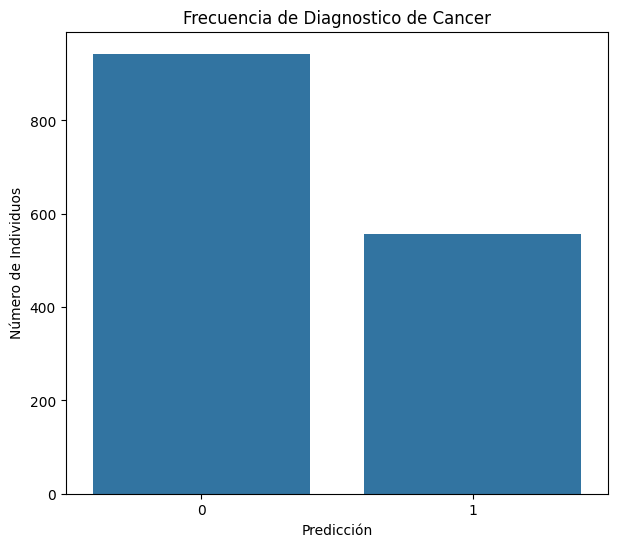

In [ ]:
#Obtener la frecuencia de cada categoría
class_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(7, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Frecuencia de Diagnostico de Cancer')
plt.xlabel('Predicción')
plt.ylabel('Número de Individuos')
plt.show()

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
optimal_depth = 24
optimal_estimator = 200
model = RandomForestClassifier(n_estimators=optimal_estimator, max_depth=optimal_depth, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=24, n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8900
Precision: 0.8430
Recall: 0.8793
F1 Score: 0.8608


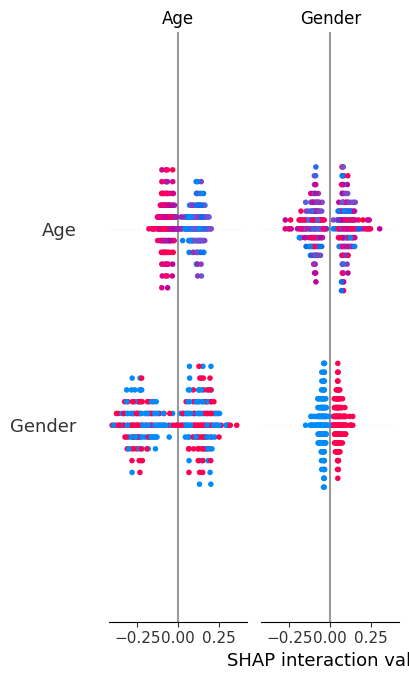

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # (1500, 9)

shap.summary_plot(shap_values, X_test)


# XGBoost

In [ ]:
df = pd.read_csv(os.path.join(path, "The_Cancer_data_1500_V2.csv"))

In [ ]:
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
target_variable = 'Diagnosis'
X = df.drop(columns=[target_variable])
y = df[target_variable]

In [ ]:
print("Class Distribution Before SMOTE:")
print(y.value_counts())

Class Distribution Before SMOTE:
Diagnosis
0    943
1    557
Name: count, dtype: int64


In [ ]:
X_train, X_test_array, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  stratify=y)


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_array = scaler.transform(X_test_array)

In [ ]:
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class Distribution After SMOTE:
Diagnosis
0    754
1    754
Name: count, dtype: int64


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 400, 500]
}

xgb_model = XGBClassifier(
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_lambda=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:13:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=0.1,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=...
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print(f"Best max_depth: {best_params['max_depth']}")
print(f"Best n_estimators: {best_params['n_estimators']}")

Best max_depth: 7
Best n_estimators: 400


In [ ]:
xgb_best_model = XGBClassifier(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_lambda=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_best_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_best_model.predict(X_test_array)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:13:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\n{model_name} Metrics:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

In [ ]:
evaluate_model(y_test, y_pred_xgb, "XGBoost (Tuned)")


XGBoost (Tuned) Metrics:
  Accuracy: 0.8567
  Precision: 0.7698
  Recall: 0.8739
  F1-score: 0.8186
  ROC-AUC: 0.8602


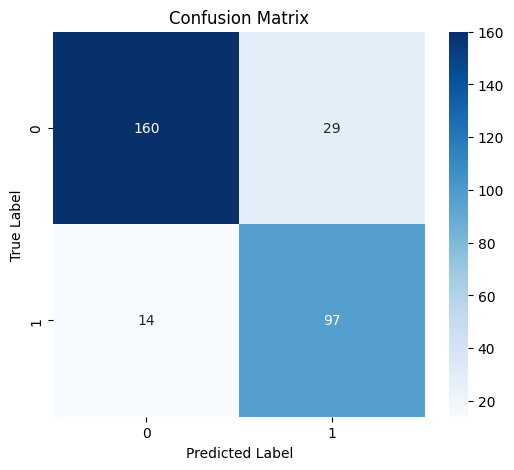

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


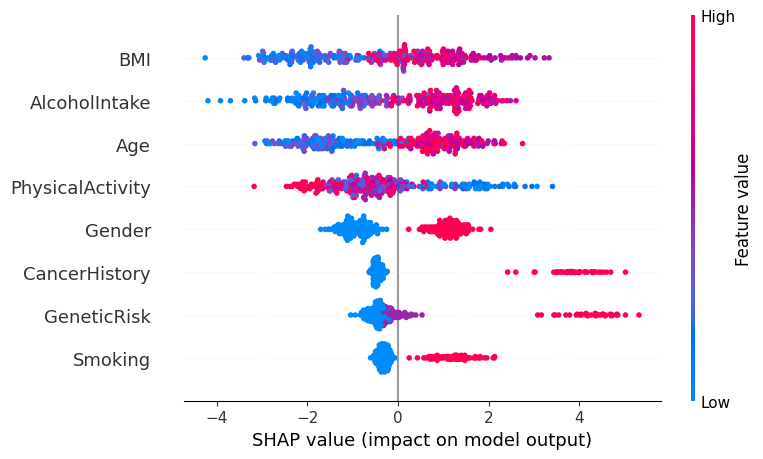

In [ ]:
X_test = pd.DataFrame(X_test_array, columns=X.columns)
explainer2 = shap.Explainer(xgb_best_model)
shap_values2 = explainer2(X_test)

shap.summary_plot(shap_values2, X_test)

In [ ]:
from lime import lime_tabular

feature_names = X_test.columns.tolist() # Obtén los nombres de las columnas

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=feature_names,
    class_names=['No Cancer', 'Cancer'],
    mode='classification'
)

# Elige una instancia de X_test para explicar
i = 0
instance_to_explain = X_test.iloc[i]

exp = explainer.explain_instance(
    data_row=instance_to_explain.values,
    predict_fn=xgb_best_model.predict_proba,
    num_features=5
)

print(f"Explicación para la instancia #{i}")
print("Predicción de probabilidad:", exp.predict_proba[1])
print("Explicación local:")
print(exp.as_list())

exp.show_in_notebook(show_all=True)

Explicación para la instancia #0
Predicción de probabilidad: 0.38183656
Explicación local:
[('GeneticRisk > 0.77', 0.45550107720876165), ('CancerHistory > -0.40', 0.4357148094012711), ('-0.98 < Gender <= 1.03', 0.21193783312123532), ('0.02 < AlcoholIntake <= 0.83', 0.16880862211181974), ('Age > 0.86', 0.16094396750829534)]


# LightGBM feature selecting

In [ ]:
df = pd.read_csv(os.path.join(path, "The_Cancer_data_1500_V2.csv"))

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [ ]:

best_depth = -1
best_score = 0
for depth in [3, 5, 7, 10, 15, 20, -1]:
    temp_model = lgb.LGBMClassifier(objective='binary', metric='binary_error', boosting_type='gbdt', max_depth=depth, seed=42)
    scores = cross_val_score(temp_model, X_train, y_train, cv=3, scoring='accuracy')
    mean_score = scores.mean()
    print(f"max_depth={depth}, Accuracy={mean_score:.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth

print(f"\nOptimal max_depth: {best_depth}")

best_model = lgb.LGBMClassifier(objective='binary', metric='binary_error', boosting_type='gbdt', max_depth=best_depth, seed=42)
best_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)])

print(f"Número de características en X_train: {X_train.shape[1]}")
print(f"Número de características en X_test: {X_test.shape[1]}")


[LightGBM] [Info] Number of positive: 503, number of negative: 502
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 1005, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500498 -> initscore=0.001990
[LightGBM] [Info] Start training from score 0.001990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       189
           1       0.89      0.75      0.81       189

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.82       378
weighted avg       0.83      0.83      0.82       378

Accuracy: 0.8254
Precision: 0.8868
Recall: 0.7460
F1-score: 0.8103


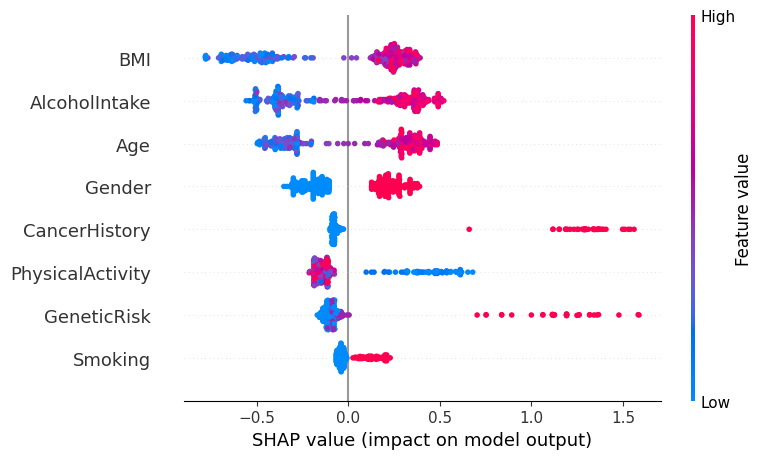


Top 5 Features Based on SHAP: ['CancerHistory', 'Gender', 'Age', 'AlcoholIntake', 'BMI']


In [ ]:
# SHAP
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# SHAP 5 feature
shap_importance = np.abs(shap_values.values).mean(axis=0)
top_5_features = X_train.columns[np.argsort(shap_importance)[-5:]]
print("\nTop 5 Features Based on SHAP:", top_5_features.tolist())


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from lime import lime_tabular

feature_names = X.columns.tolist()

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), # El explainer se entrena con los datos de entrenamiento
    feature_names=feature_names,
    class_names=['No Cancer', 'Cancer'],
    mode='classification'
)

i = 0
instance_to_explain = X_test.iloc[i]
true_label = y_test.iloc[i] # Usa .iloc para acceder a la etiqueta real

exp = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=best_model.predict_proba,
    num_features=5 # El número de características a mostrar en la explicación
)

print(f"Explicación para la instancia #{i}")
print(f"Etiqueta verdadera: {true_label}")
print(f"Predicción del modelo: {'Cancer' if best_model.predict([instance_to_explain])[0] == 1 else 'No Cancer'}")

exp.show_in_notebook(show_all=True)

print(f"\nExplicación del modelo (valores de características y sus contribuciones):")
print(exp.as_list())

Explicación para la instancia #0
Etiqueta verdadera: 1
Predicción del modelo: Cancer



Explicación del modelo (valores de características y sus contribuciones):
[('CancerHistory > 0.00', 0.2920295424760297), ('AlcoholIntake <= 1.32', -0.10325530230191374), ('0.00 < Gender <= 1.00', 0.08712375876290428), ('36.00 < Age <= 52.00', -0.07993174385753188), ('28.34 < BMI <= 34.05', 0.07116798045990796)]


In [ ]:
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

best_model.fit(X_train_top5, y_train, eval_set=[(X_test_top5, y_test)], callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)])

y_pred_prob = best_model.predict_proba(X_test_top5)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


[LightGBM] [Info] Number of positive: 754, number of negative: 754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain